### 1. Testing Scraping of the page and grabbing the embedded link

In [131]:
import pandas as pd
import requests
import re
import numpy as np
from bs4 import BeautifulSoup

url_range = list(range(101,1000,100))
#print(url_range)

url = 'https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
#print(soup)

links = []
for item in soup.find_all('tr'):
    links.append(item.find_all('a'))
    
#print(links[1][1])
link_array = np.array(links)
link_array = np.delete(link_array, 0)
#print(link_array)
link_list = []
for item in link_array:
    link_list.append(str(item[1]).split('a href="')[1].split('">')[0].split('#tab')[0])
print(np.size(link_list))
print('-'*50)
for item in link_list:
    print(item)

'''link_array = np.array(link_list)
link_array.reshape(100,1)
print(link_array)
link_df = pd.DataFrame(link_array)
link_df'''

100
--------------------------------------------------
/movie/Avatar
/movie/Avengers-Endgame-(2019)
/movie/Titanic-(1997)
/movie/Star-Wars-Ep-VII-The-Force-Awakens
/movie/Avengers-Infinity-War
/movie/Jurassic-World
/movie/Lion-King-The-(Live-Action)-(2019)
/movie/Furious-7
/movie/Avengers-The-(2012)
/movie/Frozen-II-(2019)
/movie/Avengers-Age-of-Ultron
/movie/Black-Panther
/movie/Harry-Potter-and-the-Deathly-Hallows-Part-II
/movie/Star-Wars-Ep-VIII-The-Last-Jedi
/movie/Jurassic-World-Fallen-Kingdom-(2018)
/movie/Frozen-(2013)
/movie/Beauty-and-the-Beast-(2017)
/movie/Incredibles-2
/movie/Fate-of-the-Furious-The
/movie/Iron-Man-3
/movie/Minions
/movie/Captain-America-Civil-War
/movie/Aquaman-(2018)
/movie/Spider-Man-Far-From-Home-(2019)
/movie/Captain-Marvel-(2019)
/movie/Transformers-Dark-of-the-Moon-(2011)
/movie/Lord-of-the-Rings-The-Return-of-the-King-The
/movie/Skyfall
/movie/Transformers-Age-of-Extinction
/movie/Dark-Knight-Rises-The
/movie/Toy-Story-4-(2019)
/movie/Star-Wars-The-

<ipython-input-131-491b4d75cbff>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  link_array = np.array(links)


'link_array = np.array(link_list)\nlink_array.reshape(100,1)\nprint(link_array)\nlink_df = pd.DataFrame(link_array)\nlink_df'

In [132]:
print(soup)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>
<meta content="initial-scale=

### 2. Create a dataframe with the scraped data from the table on the page

In [2]:
#movies = soup.select('td.summary')
#print(movies)
list_check = []
for tr in soup.find_all('tr'):
    list_check.append(tr.get_text().split('\n'))
    
array = np.array(list_check)
array = array.reshape(101,8)
print(np.size(array))
df = pd.DataFrame(array,index=array[:,1])
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.columns = (['Rank','Rank','Year','Movie','WorldwideBox_Office','DomesticBox_Office','InternationalBox_Office', 'Extra'])
df['url'] = link_list
df


808


,Rank,Rank,Year,Movie,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,Extra,url
1,,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",,/movie/Avatar
2,,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",,/movie/Avengers-Endgame-(2019)
3,,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",,/movie/Titanic-(1997)
4,,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",,/movie/Star-Wars-Ep-VII-The-Force-Awakens
5,,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",,/movie/Avengers-Infinity-War
...,...,...,...,...,...,...,...,...,...
96,,96,2018,Deadpool 2,"$786,362,370","$324,591,735","$461,770,635",,/movie/Deadpool-2
97,,97,2016,Deadpool,"$784,157,111","$363,070,709","$421,086,402",,/movie/Deadpool
98,,98,1977,Star Wars Ep. IV: A New Hope,"$775,398,007","$460,998,007","$314,400,000",,/movie/Star-Wars-Ep-IV-A-New-Hope
99,,99,2014,Guardians of the Galaxy,"$770,882,395","$333,714,112","$437,168,283",,/movie/Guardians-of-the-Galaxy


### 3. Order the data by year and plot the Box Office

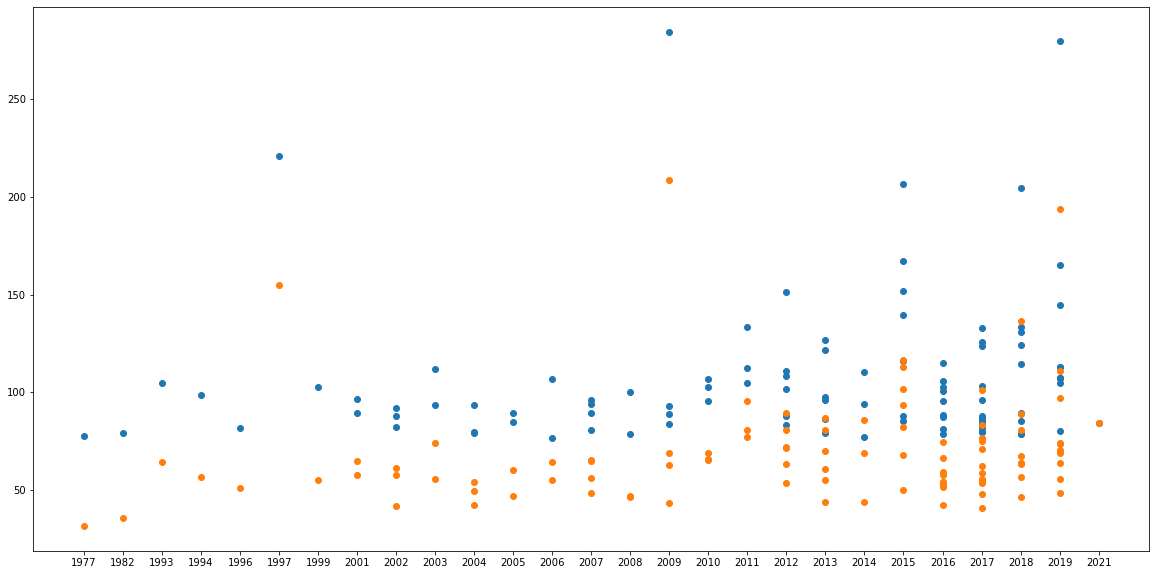

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
no_sign_WW = []
no_sign_intl = []
no_sign_dom = []
index = 0
for item in df.WorldwideBox_Office:
    no_sign_WW.append(int(float(item[1:].replace(',',''))))
    index += 1

index = 0
for item in df.DomesticBox_Office:
    number = item[1:].replace(',','')
    #print(number)
'''    no_sign_dom.append(int(float(number)))
    index += 1'''

index = 0
for item in df.InternationalBox_Office:
    no_sign_intl.append(int(float(item[1:].replace(',',''))))
    index += 1
    
df['no_sign_ww'] = no_sign_WW
df['no_sign_intl'] = no_sign_intl
#df['no_sign_dom'] = no_sign_dom

#print(df.no_sign_ww)
df = df.sort_values('Year')

plt.figure(figsize=(20,10))
fig = plt.scatter(df.Year,df.no_sign_ww/10000000)
#fig2 = plt.scatter(df.Year,df.no_sign_dom/10000000)
fig3 = plt.scatter(df.Year,df.no_sign_intl/10000000)







Text(0.5, 1.0, 'Movies Distribution Across the Years')

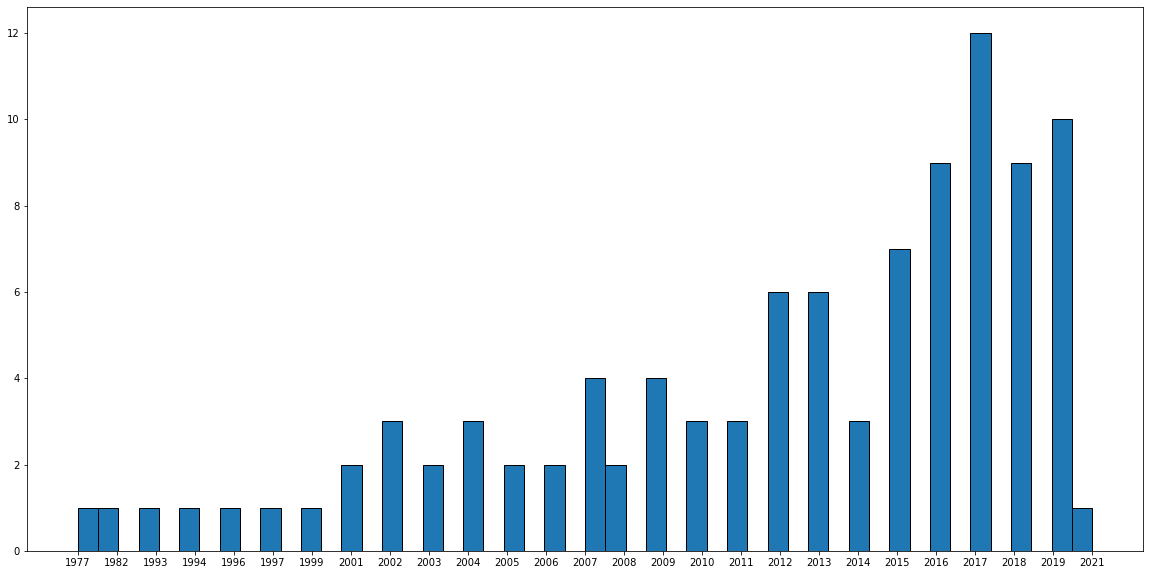

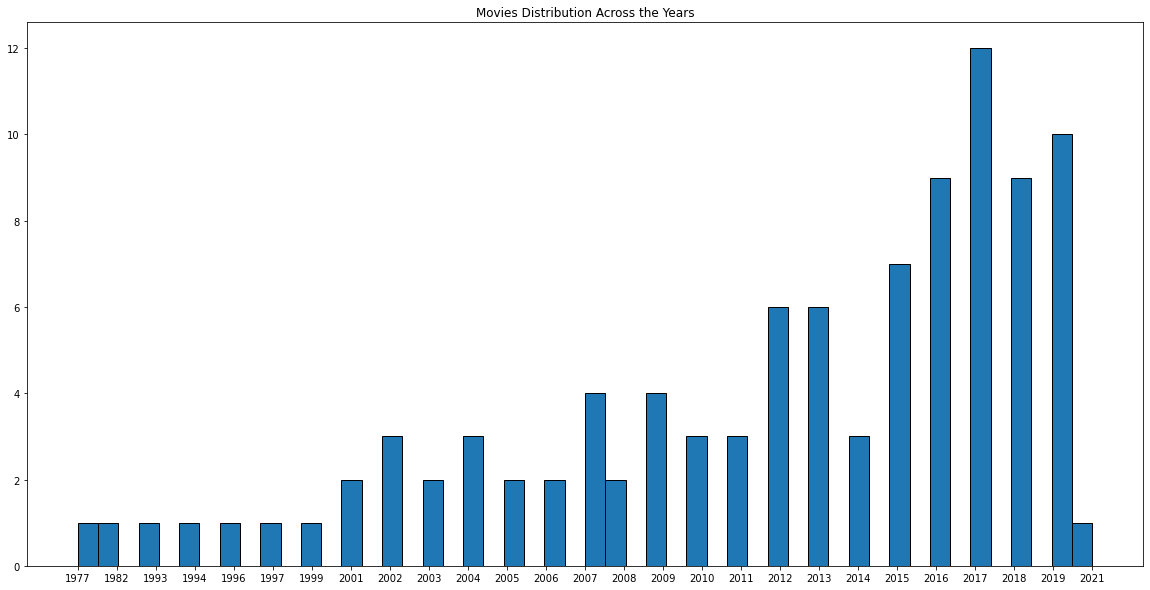

In [4]:
plt.figure(figsize=(20,10))

fig4 = plt.hist(df.Year, bins = 50,edgecolor='black')
#plt.title('Movies Distribution Across the Years')
plt.figure(figsize=(20,10))

fig4 = plt.hist(df.Year, bins = 50,edgecolor='black')
plt.title('Movies Distribution Across the Years')

### 4.Collect the table for the top 1000 grossing movies

In [5]:
import pandas as pd
import requests
import re
import numpy as np
from bs4 import BeautifulSoup

url_range = list(range(1,1000,100))
print(url_range)

url = 'https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/'
list_check = []
link_list = []
for index in url_range:
    response = requests.get(url + str(index))
    soup = BeautifulSoup(response.text, 'lxml')
    #soup = soup[1:]
    #print(soup)

    #links = soup.select('td.href')

    for tr in soup.find_all('tr'):
        if 'Rank' in str(tr):
            continue
        else:
            list_check.append(tr.get_text().split('\n'))

    links = []
    for item in soup.find_all('tr'):
        links.append(item.find_all('a'))

    link_array = np.array(links)
    link_array = np.delete(link_array, 0)
    #print(link_array)
    for item in link_array:
        link_list.append(str(item[1]).split('a href="')[1].split('">')[0].split('#tab')[0])

new_array = np.array(list_check)

#array = array.reshape(101,8)

df2 = pd.DataFrame(new_array,index=new_array[:,1])
df2.columns = (['Rank1','Rank2','Year','Movie','WorldwideBox_Office','DomesticBox_Office','InternationalBox_Office', 'Extra'])
df2['url'] = link_list
df2

[1, 101, 201, 301, 401, 501, 601, 701, 801, 901]


<ipython-input-5-b75342c31c7d>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  link_array = np.array(links)


,Rank1,Rank2,Year,Movie,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,Extra,url
1,,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",,/movie/Avatar
2,,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",,/movie/Avengers-Endgame-(2019)
3,,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",,/movie/Titanic-(1997)
4,,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",,/movie/Star-Wars-Ep-VII-The-Force-Awakens
5,,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",,/movie/Avengers-Infinity-War
...,...,...,...,...,...,...,...,...,...
996,,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",,/movie/Cloverfield
997,,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",,/movie/Mr-Deeds
998,,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",,/movie/Other-Guys-The-(2010)
999,,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",,/movie/Zookeeper


In [6]:
df2.head()

,Rank1,Rank2,Year,Movie,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,Extra,url
1,,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",,/movie/Avatar
2,,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",,/movie/Avengers-Endgame-(2019)
3,,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",,/movie/Titanic-(1997)
4,,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",,/movie/Star-Wars-Ep-VII-The-Force-Awakens
5,,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",,/movie/Avengers-Infinity-War


### 5. Plot the data like you did above

,Rank1,Rank2,Year,Movie,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,Extra,url,no_sign_ww
1,,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",,/movie/Avatar,2845899541
2,,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",,/movie/Avengers-Endgame-(2019),2797800564
3,,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",,/movie/Titanic-(1997),2207986545
4,,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",,/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817
5,,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",,/movie/Avengers-Infinity-War,2044540523
...,...,...,...,...,...,...,...,...,...,...
996,,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",,/movie/Cloverfield,171302226
997,,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",,/movie/Mr-Deeds,171269535
998,,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",,/movie/Other-Guys-The-(2010),170936470
999,,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",,/movie/Zookeeper,170805525


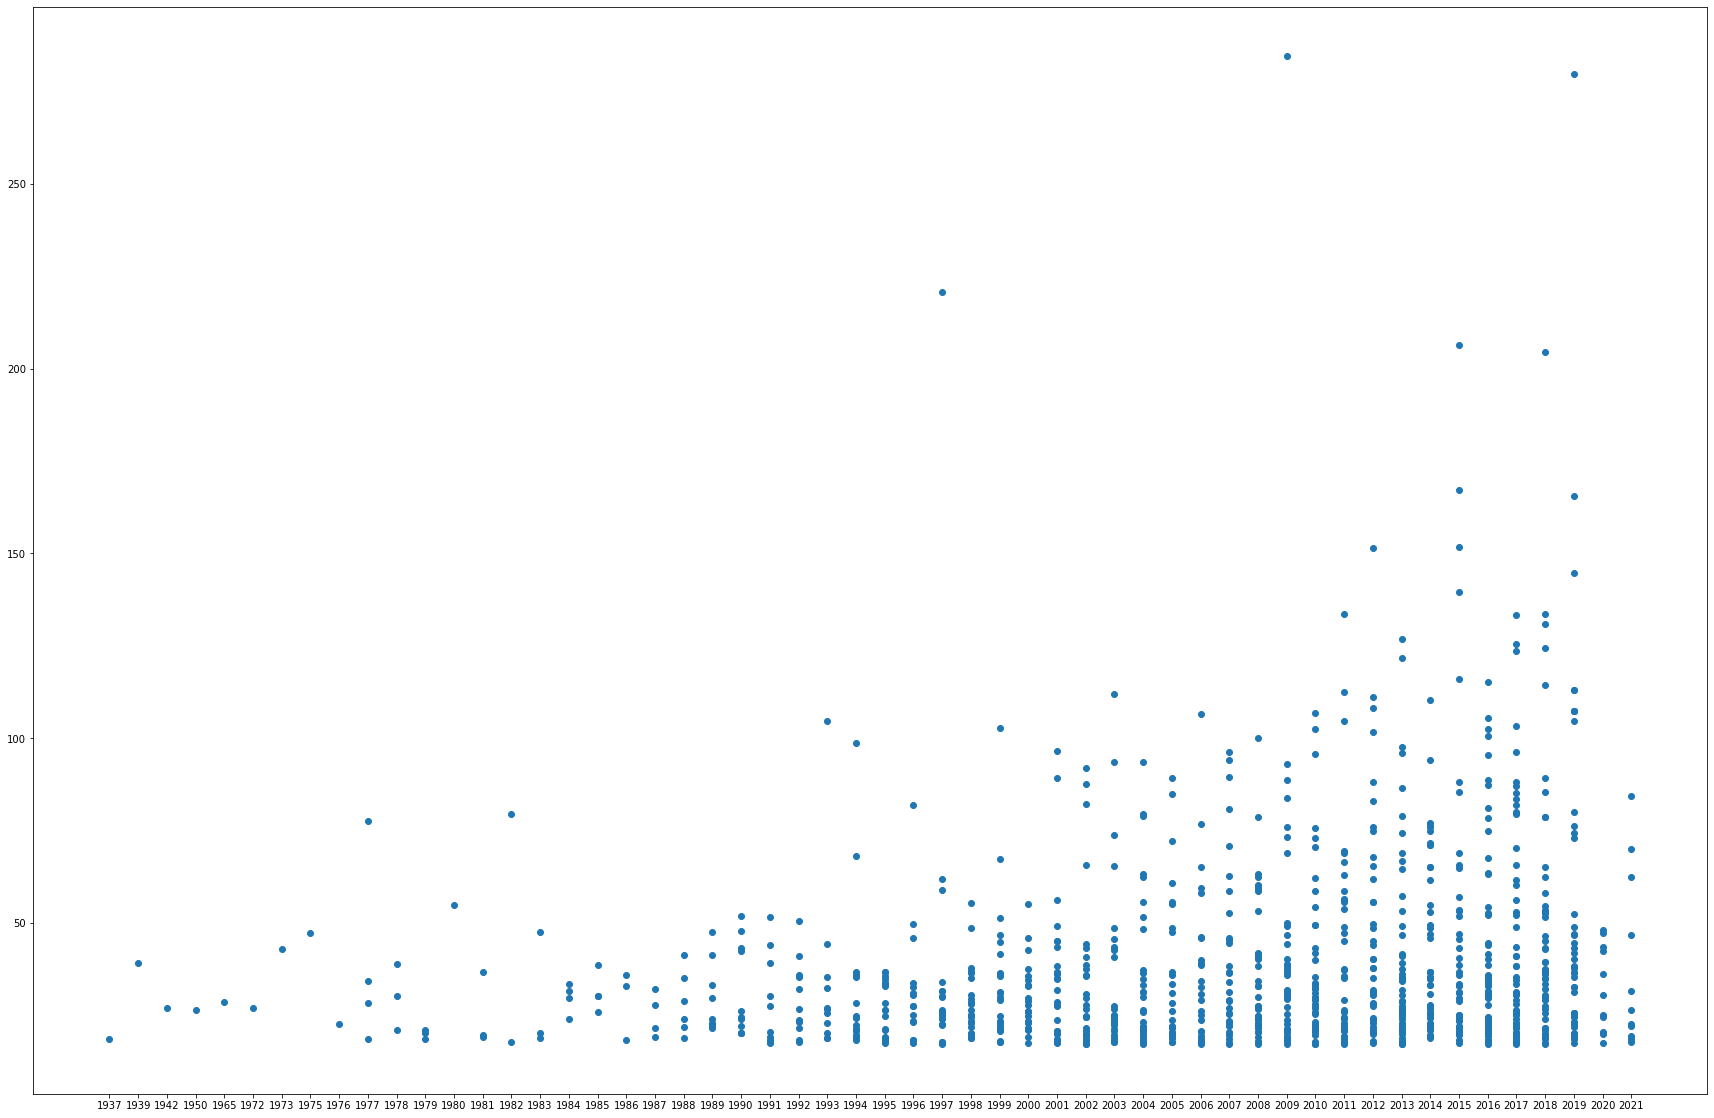

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
no_sign_WW = []
no_sign_intl = []
no_sign_dom = []
index = 0
for item in df2.WorldwideBox_Office:
    no_sign_WW.append(int(float(item[1:].replace(',',''))))
    index += 1

index = 0
#for item in df2.DomesticBox_Office:
    #number = item[1:].replace(',','')
    #print(number)
'''    no_sign_dom.append(int(float(number)))
    index += 1'''

index = 0
#for item in df2.InternationalBox_Office:
    #no_sign_intl.append(int(float(item[1:].replace(',',''))))
    #index += 1
    
df2['no_sign_ww'] = no_sign_WW
#df2['no_sign_intl'] = no_sign_intl
#df['no_sign_dom'] = no_sign_dom

#print(df.no_sign_ww)

df_Yearsorted = df2.sort_values('Year')

plt.figure(figsize=(30,20))
fig = plt.scatter(df_Yearsorted.Year,df_Yearsorted.no_sign_ww/10000000)
#fig2 = plt.scatter(df2.Year,df.no_sign_dom/10000000)
#fig3 = plt.scatter(df2.Year,df2.no_sign_intl/10000000)
df2

### 6. Go into the movie link page and scrape the production companies and the genre

In [135]:
host = 'https://www.the-numbers.com/'
path = '/movie/Avatar'
response = requests.get(host + path[1:])
soup2 = BeautifulSoup(response.text, 'lxml')
test = soup2.find_all('tr')
genre_list = []
production_list = []
for item in test:
    if '<td><b>Genre:</b></td>' in str(item):
        genre_list.append(str(item).split('<td><b>Genre:</b></td>')[1].split('</td>')[0])
    elif '<td><b>Production Companies:</b></td>' in str(item):
        production_list.append(str(item).split('<td><b>Production Companies:</b></td>')[1].split('</td>')[0])
#print(genre_list)
#print(production_list)
new_list = []
temp_str = production_list[0]

for index in list(range(0,production_list[0].count('movies/production-company/'))):
    new_list.append(str(temp_str).split('movies/production-company/')[1].split('">')[0])
    temp_str = str(temp_str).split('</a>, ',1)[1:]

production_list = new_list

new_list = []
temp_str = genre_list[0]

for index in list(range(0,genre_list[0].count('/market/genre/'))):
    new_list.append(str(temp_str).split('/market/genre/')[1].split('">')[0])
    temp_str = str(temp_str).split('</a>, ',1)[1:]

genre_list = new_list

print(production_list)
print(genre_list)


['Dune-Entertainment', '20th-Century-Fox', 'Ingenious-Film-Partners']
['Action']


#### a. Showing contents to investigate how to split the scraped content

In [9]:
print(soup2)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>
<meta content="initial-scale=

### 7. Iterate through movie links and get list of production studios and genres for each - Takes time as it opens 1000 links to get the information requested

In [11]:
host = 'https://www.the-numbers.com/'
df2.sort_values('Rank2')
info_array = []
iterator = 1
for path in df2.url:
    print('\n' + str(iterator) + ' Movie Path: ' + str(path))
    response = requests.get(host + path[1:])
    soup2 = BeautifulSoup(response.text, 'lxml')
    test = soup2.find_all('tr')
    genre_list = []
    production_list = []
    for item in test:
        if '<td><b>Genre:</b></td>' in str(item):
            genre_list.append(str(item).split('<td><b>Genre:</b></td>')[1].split('</td>')[0])
        elif '<td><b>Production Companies:</b></td>' in str(item):
            production_list.append(str(item).split('<td><b>Production Companies:</b></td>')[1].split('</td>')[0])
    #print('\nGenre List: ' + str(genre_list))
    #print('\nProduction List: ' + str(production_list))
    new_list = []
    if production_list != []:
        temp_str = production_list[0]
    else:
        temp_str = 'Nan'

    if temp_str != 'Nan':
        for index in list(range(0,production_list[0].count('movies/production-company/'))):
            new_list.append(str(temp_str).split('movies/production-company/')[1].split('">')[0])
            temp_str = str(temp_str).split('</a>, ',1)[1:]
    else:
        new_list.append(temp_str)

    production_list = new_list

    new_list = []
    temp_str = genre_list[0]

    for index in list(range(0,genre_list[0].count('/market/genre/'))):
        new_list.append(str(temp_str).split('/market/genre/')[1].split('">')[0])
        temp_str = str(temp_str).split('</a>, ',1)[1:]

    genre_list = new_list
    #print('\nNew Genre List: ' + str(genre_list))
    #print('\nNew Production List: ' + str(production_list))
    info_array.append([path, genre_list, production_list])
    #print(info_array)
    iterator += 1
print('-'*100)
print('-'*100)
print(production_list)
print(genre_list)



1 Movie Path: /movie/Avatar

2 Movie Path: /movie/Avengers-Endgame-(2019)

3 Movie Path: /movie/Titanic-(1997)

4 Movie Path: /movie/Star-Wars-Ep-VII-The-Force-Awakens

5 Movie Path: /movie/Avengers-Infinity-War

6 Movie Path: /movie/Jurassic-World

7 Movie Path: /movie/Lion-King-The-(Live-Action)-(2019)

8 Movie Path: /movie/Furious-7

9 Movie Path: /movie/Avengers-The-(2012)

10 Movie Path: /movie/Frozen-II-(2019)

11 Movie Path: /movie/Avengers-Age-of-Ultron

12 Movie Path: /movie/Black-Panther

13 Movie Path: /movie/Harry-Potter-and-the-Deathly-Hallows-Part-II

14 Movie Path: /movie/Star-Wars-Ep-VIII-The-Last-Jedi

15 Movie Path: /movie/Jurassic-World-Fallen-Kingdom-(2018)

16 Movie Path: /movie/Frozen-(2013)

17 Movie Path: /movie/Beauty-and-the-Beast-(2017)

18 Movie Path: /movie/Incredibles-2

19 Movie Path: /movie/Fate-of-the-Furious-The

20 Movie Path: /movie/Iron-Man-3

21 Movie Path: /movie/Minions

22 Movie Path: /movie/Captain-America-Civil-War

23 Movie Path: /movie/Aqua


177 Movie Path: /movie/Kong-Skull-Island

178 Movie Path: /movie/Monsters-Inc

179 Movie Path: /movie/Cars-2

180 Movie Path: /movie/Madagascar

181 Movie Path: /movie/Ted

182 Movie Path: /movie/Day-After-Tomorrow-The

183 Movie Path: /movie/Puss-in-Boots

184 Movie Path: /movie/Brave

185 Movie Path: /movie/Armageddon

186 Movie Path: /movie/King-Kong-(2005)

187 Movie Path: /movie/Mission-Impossible-2

188 Movie Path: /movie/Star-Wars-Ep-V-The-Empire-Strikes-Back

189 Movie Path: /movie/American-Sniper

190 Movie Path: /movie/Tang-Ren-Jie-Tan-An-2-(China)

191 Movie Path: /movie/Despicable-Me

192 Movie Path: /movie/X-Men-Apocalypse-(2016)

193 Movie Path: /movie/Sherlock-Holmes-A-Game-of-Shadows

194 Movie Path: /movie/Cinderella-(2015)

195 Movie Path: /movie/Hong-Hai-Xing-Dong-(China)

196 Movie Path: /movie/Revenant-The-(2015)

197 Movie Path: /movie/WALL-E

198 Movie Path: /movie/World-War-Z

199 Movie Path: /movie/Ralph-Breaks-The-Internet-(2018)

200 Movie Path: /movie/Godzi


364 Movie Path: /movie/Notting-Hill-(1999)

365 Movie Path: /movie/Shazam-(2019)

366 Movie Path: /movie/Nun-The

367 Movie Path: /movie/Bugs-Life-A

368 Movie Path: /movie/Oceans-Twelve

369 Movie Path: /movie/Alvin-and-the-Chipmunks

370 Movie Path: /movie/Planet-of-the-Apes-(2001)

371 Movie Path: /movie/Hangover-3-The

372 Movie Path: /movie/Tenet-(2020)

373 Movie Path: /movie/World-is-Not-Enough-The

374 Movie Path: /movie/Zhuo-yao-ji-2-(China)-(2018)

375 Movie Path: /movie/Fast-and-Furious-(2009)

376 Movie Path: /movie/Zhuo-yao-ji-(China)-(2015)

377 Movie Path: /movie/Batman-Begins

378 Movie Path: /movie/Home-Alone-2-Lost-in-New-York

379 Movie Path: /movie/Minority-Report

380 Movie Path: /movie/Flintstones-The

381 Movie Path: /movie/Kimi-no-na-wa-(Japan)

382 Movie Path: /movie/Top-Gun

383 Movie Path: /movie/Goldeneye

384 Movie Path: /movie/American-Beauty

385 Movie Path: /movie/Dinosaur

386 Movie Path: /movie/Catch-Me-if-You-Can

387 Movie Path: /movie/X-Men-First-C


556 Movie Path: /movie/Jerry-Maguire

557 Movie Path: /movie/Tomb-Raider-(2018)

558 Movie Path: /movie/Lincoln

559 Movie Path: /movie/Lara-Croft-Tomb-Raider

560 Movie Path: /movie/Bad-Boys-II

561 Movie Path: /movie/Grown-Ups

562 Movie Path: /movie/Princess-and-the-Frog-The

563 Movie Path: /movie/Neighbors-(2013)

564 Movie Path: /movie/Firm-The

565 Movie Path: /movie/Mr-Peabody-and-Sherman

566 Movie Path: /movie/10-000-B-C

567 Movie Path: /movie/Godfather-The

568 Movie Path: /movie/Exodus-Gods-and-Kings

569 Movie Path: /movie/Expendables-The

570 Movie Path: /movie/Bambi-(1942)

571 Movie Path: /movie/American-Gangster

572 Movie Path: /movie/Were-the-Millers

573 Movie Path: /movie/xXx

574 Movie Path: /movie/Batman-Returns

575 Movie Path: /movie/Somethings-Gotta-Give

576 Movie Path: /movie/Indecent-Proposal

577 Movie Path: /movie/Maze-Runner-The-Death-Cure

578 Movie Path: /movie/Incredible-Hulk-The

579 Movie Path: /movie/Waterworld

580 Movie Path: /movie/Truman-Show


756 Movie Path: /movie/Patriot-The-(2000)

757 Movie Path: /movie/Valerian-and-the-City-of-a-Thousand-Planets-(France)

758 Movie Path: /movie/Australia-(2008)

759 Movie Path: /movie/Just-Go-With-It

760 Movie Path: /movie/Hansel-and-Gretel-Witch-Hunters

761 Movie Path: /movie/Flightplan

762 Movie Path: /movie/Bourne-Identity-The

763 Movie Path: /movie/Xia-Luo-Te-Fan-Nao-(China)(2015)

764 Movie Path: /movie/Dirty-Dancing-(1987)

765 Movie Path: /movie/Smallfoot-(2018)

766 Movie Path: /movie/Creed-II-(2018)

767 Movie Path: /movie/Crouching-Tiger-Hidden-Dragon

768 Movie Path: /movie/Vertical-Limit

769 Movie Path: /movie/Battle-Los-Angeles

770 Movie Path: /movie/Miss-Congeniality

771 Movie Path: /movie/Help-The

772 Movie Path: /movie/Lemony-Snickets-A-Series-of-Unfortunate-Events

773 Movie Path: /movie/Master-and-Commander-The-Far-Side-of-the-World

774 Movie Path: /movie/Pulp-Fiction

775 Movie Path: /movie/Into-the-Woods

776 Movie Path: /movie/District-9

777 Movie Path: 


946 Movie Path: /movie/How-to-Lose-a-Guy-in-10-Days

947 Movie Path: /movie/Dantes-Peak-(1997)

948 Movie Path: /movie/Patriot-Games

949 Movie Path: /movie/Flubber

950 Movie Path: /movie/Double-Jeopardy

951 Movie Path: /movie/Jet-Lis-Hero

952 Movie Path: /movie/Paranormal-Activity-2-(2010)

953 Movie Path: /movie/A-Team-The

954 Movie Path: /movie/Tootsie

955 Movie Path: /movie/Chinese-Doctors-(2021-China)

956 Movie Path: /movie/Butler-The

957 Movie Path: /movie/Brokeback-Mountain

958 Movie Path: /movie/Analyze-This

959 Movie Path: /movie/Kill-Bill-Volume-1

960 Movie Path: /movie/40-Year-old-Virgin-The

961 Movie Path: /movie/Hot-Shots

962 Movie Path: /movie/Italian-Job-The-(2003)

963 Movie Path: /movie/Dr-Dolittle-2

964 Movie Path: /movie/Cowboys-and-Aliens

965 Movie Path: /movie/Baywatch

966 Movie Path: /movie/Daddys-Home-2

967 Movie Path: /movie/Bridges-of-Madison-County-The-(1995)

968 Movie Path: /movie/Descendants-The

969 Movie Path: /movie/Identity-Thief

970 M

In [12]:
np.size(info_array)

/Users/sshahbuddin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


3000

In [13]:
array_info = np.array(info_array)

<ipython-input-13-53411d27b178>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  array_info = np.array(info_array)


In [14]:
np.size(array_info)

3000

In [15]:
array_info.reshape(1000,3)

array([['/movie/Avatar', list(['Action']),
        list(['Dune-Entertainment', '20th-Century-Fox', 'Ingenious-Film-Partners'])],
       ['/movie/Avengers-Endgame-(2019)', list(['Action']),
        list(['Marvel-Studios'])],
       ['/movie/Titanic-(1997)', list(['Drama']),
        list(['20th-Century-Fox', 'Paramount-Pictures', 'Lightstorm-Entertainment'])],
       ...,
       ['/movie/Other-Guys-The-(2010)', list(['Comedy']),
        list(['Gary-Sanchez-Productions', 'Mosaic-Media', 'Sony-Pictures'])],
       ['/movie/Zookeeper', list(['Romantic-Comedy']),
        list(['Columbia-Pictures', 'Metro-Goldwyn-Mayer-Pictures', 'Broken-Road', 'Hey-Eddie', 'Happy-Madison'])],
       ['/movie/Meet-the-Robinsons', list(['Adventure']),
        list(['Walt-Disney-Pictures', 'Dorothy-McKim'])]], dtype=object)

In [16]:
df_info = pd.DataFrame(array_info)

In [17]:
df_info.columns = ['url', 'Genre', 'Production_Companies']

In [18]:
df_info

,url,Genre,Production_Companies
0,/movie/Avatar,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio..."
1,/movie/Avengers-Endgame-(2019),[Action],[Marvel-Studios]
2,/movie/Titanic-(1997),[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst..."
3,/movie/Star-Wars-Ep-VII-The-Force-Awakens,[Adventure],"[Lucasfilm, Bad-Robot]"
4,/movie/Avengers-Infinity-War,[Action],[Marvel-Studios]
...,...,...,...
995,/movie/Cloverfield,[Action],[Bad-Robot]
996,/movie/Mr-Deeds,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad..."
997,/movie/Other-Guys-The-(2010),[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-..."
998,/movie/Zookeeper,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur..."


### 8. Create DataFrame with joint information

In [19]:
joint_df = pd.merge(df2, df_info, on='url')

In [20]:
joint_df

,Rank1,Rank2,Year,Movie,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,Extra,url,no_sign_ww,Genre,Production_Companies
0,,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",,/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio..."
1,,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",,/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios]
2,,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",,/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst..."
3,,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",,/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]"
4,,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",,/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios]
...,...,...,...,...,...,...,...,...,...,...,...,...
995,,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",,/movie/Cloverfield,171302226,[Action],[Bad-Robot]
996,,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",,/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad..."
997,,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",,/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-..."
998,,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",,/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur..."


### 9. Gathering Inflation Adjusted Numbers

In [21]:
import pandas as pd
import requests
import re
import numpy as np
from bs4 import BeautifulSoup

inf_links = []
url = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted'
response = requests.get(url)
soup3 = BeautifulSoup(response.text, 'lxml')

for link in soup3.find_all('tr'):
    inf_links.append(link.find_all('a'))

inf_link_array = np.array(inf_links)
inf_link_array = np.delete(inf_link_array, 0) 
inf_link_list = [] #This is the URLs for each of the movies in the dataframe ranking below
for item in inf_link_array:
    inf_link_list.append(str(item[1]).split('a href="')[1].split('">')[0].split('#tab')[0])
print(np.size(inf_link_list))

inf_list_check = []
for tr in soup3.find_all('tr'):
    inf_list_check.append(tr.get_text().split('\n'))
    
inf_array = np.array(inf_list_check)
inf_array = inf_array.reshape(101,6)
print(np.size(inf_array))
inf_df = pd.DataFrame(inf_array,index=inf_array[:,1])
inf_df.columns = ['inf_Rank1','inf_Rank2','Released','Movie','Infl_Adj_Total_Box_Office','Null']
inf_df = inf_df[1:]
inf_df['url'] = inf_link_list
inf_df

100
606


<ipython-input-21-212de527b877>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  inf_link_array = np.array(inf_links)


,inf_Rank1,inf_Rank2,Released,Movie,Infl_Adj_Total_Box_Office,Null,url
1,,1,1977,Star Wars Ep. IV: A New Hope,"$1,505,273,746",,/movie/Star-Wars-Ep-IV-A-New-Hope
2,,2,1997,Titanic,"$1,247,410,568",,/movie/Titanic-(1997)
3,,3,1982,E.T. the Extra-Terrestrial,"$1,231,303,789",,/movie/ET-The-Extra-Terrestrial
4,,4,2015,Star Wars Ep. VII: The Force Awakens,"$1,012,399,043",,/movie/Star-Wars-Ep-VII-The-Force-Awakens
5,,5,2009,Avatar,"$904,178,608",,/movie/Avatar
...,...,...,...,...,...,...,...
96,,96,2008,Iron Man,"$406,442,271",,/movie/Iron-Man
97,,97,2004,Meet the Fockers,"$406,412,227",,/movie/Meet-the-Fockers
98,,98,2008,Indiana Jones and the Kingdom of the Crystal S...,"$404,546,829",,/movie/Indiana-Jones-and-the-Kingdom-of-the-Cr...
99,,99,1984,Gremlins,"$403,935,436",,/movie/Gremlins


### 10. Iterate through all 1000 for inflation dataframe and join to prior DF

In [22]:
import pandas as pd
import requests
import re
import numpy as np
from bs4 import BeautifulSoup

url_range = list(range(1,1000,100))
print(url_range)
inf_links = []
url = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/'
inf_list_check = []
for index in url_range:
    print('index is: ' + str(index))
    response = requests.get(url + str(index))
    print('\n' + url + str(index))
    soup3 = BeautifulSoup(response.text, 'lxml')
    
    for link in soup3.find_all('tr'):
        inf_links.append(link.find_all('a'))

    inf_link_array = np.array(inf_links)
    inf_link_array = np.delete(inf_link_array, 0) 
    inf_link_list = [] #This is the URLs for each of the movies in the dataframe ranking below
    # print(inf_link_array)
    for item in inf_link_array:
        if item != []:
            inf_link_list.append(str(item[1]).split('a href="')[1].split('">')[0].split('#tab')[0])
            
    # print(np.size(inf_link_list))

    for tr in soup3.find_all('tr'):
        if 'Rank' in str(tr):
            continue
        else:
            inf_list_check.append(tr.get_text().split('\n'))
    
inf_array = np.array(inf_list_check)
#inf_array = inf_array.reshape(101,6)
print(np.size(inf_array))
#inf_df = pd.DataFrame(inf_array,index=inf_array[:,1])
#inf_df.columns = ['inf_Rank1','inf_Rank2','Released','Movie','Infl_Adj_Total_Box_Office','Null']
#inf_df = inf_df[1:]
#inf_df['url'] = inf_link_list
#inf_df

[1, 101, 201, 301, 401, 501, 601, 701, 801, 901]
index is: 1

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/1
index is: 101


<ipython-input-22-0bb7df476c45>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  inf_link_array = np.array(inf_links)



https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/101
index is: 201

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/201
index is: 301

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/301
index is: 401

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/401
index is: 501

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/501
index is: 601

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/601
index is: 701

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/701
index is: 801

https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time-inflation-adjusted/801
index is: 901


In [23]:
print(np.size(inf_link_list))

1000


In [24]:
inf_array = inf_array.reshape(1000,6)

inf_df_complete = pd.DataFrame(inf_array, index = inf_array[:,1])
inf_df_complete.columns = ['Null','Infl_Rank', 'Year', 'Movie', 'Infl_Gross_Box_Office','Null']
inf_df_complete['url'] = inf_link_list
inf_df_complete

,Null,Infl_Rank,Year,Movie,Infl_Gross_Box_Office,Null,url
1,,1,1977,Star Wars Ep. IV: A New Hope,"$1,505,273,746",,/movie/Star-Wars-Ep-IV-A-New-Hope
2,,2,1997,Titanic,"$1,247,410,568",,/movie/Titanic-(1997)
3,,3,1982,E.T. the Extra-Terrestrial,"$1,231,303,789",,/movie/ET-The-Extra-Terrestrial
4,,4,2015,Star Wars Ep. VII: The Force Awakens,"$1,012,399,043",,/movie/Star-Wars-Ep-VII-The-Force-Awakens
5,,5,2009,Avatar,"$904,178,608",,/movie/Avatar
...,...,...,...,...,...,...,...
996,,996,2004,SpongeBob SquarePants: The Movie,"$125,831,085",,/movie/SpongeBob-SquarePants-The-Movie
997,,997,1993,Tombstone,"$125,807,910",,/movie/Tombstone
998,,998,1992,Beethoven,"$125,766,745",,/movie/Beethoven
999,,999,2003,Freddy vs. Jason,"$125,509,697",,/movie/Freddy-vs-Jason


In [25]:
temp_df = inf_df_complete
#temp_df['Infl_Gross_Box_Office'] = inf_df_complete.Infl_Gross_Box_Office
#temp_df['url'] = inf_df_complete.url
temp_df = temp_df.drop(['Null', 'Year'], axis = 1)
temp_df

,Infl_Rank,Movie,Infl_Gross_Box_Office,url
1,1,Star Wars Ep. IV: A New Hope,"$1,505,273,746",/movie/Star-Wars-Ep-IV-A-New-Hope
2,2,Titanic,"$1,247,410,568",/movie/Titanic-(1997)
3,3,E.T. the Extra-Terrestrial,"$1,231,303,789",/movie/ET-The-Extra-Terrestrial
4,4,Star Wars Ep. VII: The Force Awakens,"$1,012,399,043",/movie/Star-Wars-Ep-VII-The-Force-Awakens
5,5,Avatar,"$904,178,608",/movie/Avatar
...,...,...,...,...
996,996,SpongeBob SquarePants: The Movie,"$125,831,085",/movie/SpongeBob-SquarePants-The-Movie
997,997,Tombstone,"$125,807,910",/movie/Tombstone
998,998,Beethoven,"$125,766,745",/movie/Beethoven
999,999,Freddy vs. Jason,"$125,509,697",/movie/Freddy-vs-Jason


In [26]:
np.size(temp_df)
joint_df

,Rank1,Rank2,Year,Movie,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,Extra,url,no_sign_ww,Genre,Production_Companies
0,,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",,/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio..."
1,,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",,/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios]
2,,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",,/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst..."
3,,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",,/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]"
4,,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",,/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios]
...,...,...,...,...,...,...,...,...,...,...,...,...
995,,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",,/movie/Cloverfield,171302226,[Action],[Bad-Robot]
996,,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",,/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad..."
997,,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",,/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-..."
998,,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",,/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur..."


In [27]:
joint_df.to_csv(r'~/Berkeley_MIDS/joint_test.csv', index=True)
temp_df.to_csv(r'~/Berkeley_MIDS/temp_test.csv', index=True)

In [28]:
final_df = pd.merge(joint_df, temp_df, on = 'url', how = 'left')
final_df

,Rank1,Rank2,Year,Movie_x,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,Extra,url,no_sign_ww,Genre,Production_Companies,Infl_Rank,Movie_y,Infl_Gross_Box_Office
0,,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",,/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,Avatar,"$904,178,608"
1,,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",,/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,Avengers: Endgame,"$858,373,002"
2,,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",,/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,Titanic,"$1,247,410,568"
3,,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",,/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,Star Wars Ep. VII: The Force Awakens,"$1,012,399,043"
4,,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",,/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,Avengers: Infinity War,"$682,541,141"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",,/movie/Cloverfield,171302226,[Action],[Bad-Robot],NaN,NaN,NaN
996,,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",,/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad...",489,Mr. Deeds,"$199,113,256"
997,,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",,/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-...",882,The Other Guys,"$138,410,009"
998,,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",,/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur...",NaN,NaN,NaN


In [29]:
final_df = final_df.drop(['Rank1','Extra'], axis = 1)
final_df.rename(columns={"Rank2": 'Rank'})

,Rank,Year,Movie_x,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,url,no_sign_ww,Genre,Production_Companies,Infl_Rank,Movie_y,Infl_Gross_Box_Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,Avatar,"$904,178,608"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,Avengers: Endgame,"$858,373,002"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,Titanic,"$1,247,410,568"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,Star Wars Ep. VII: The Force Awakens,"$1,012,399,043"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,Avengers: Infinity War,"$682,541,141"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",/movie/Cloverfield,171302226,[Action],[Bad-Robot],NaN,NaN,NaN
996,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad...",489,Mr. Deeds,"$199,113,256"
997,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-...",882,The Other Guys,"$138,410,009"
998,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur...",NaN,NaN,NaN


In [30]:
final_df = final_df.drop('Movie_y',axis = 1)
final_df.rename(columns = {'Rank2': 'Rank'})
final_df.rename(columns = {'Movie_x': 'Movie'})

,Rank2,Year,Movie,WorldwideBox_Office,DomesticBox_Office,InternationalBox_Office,url,no_sign_ww,Genre,Production_Companies,Infl_Rank,Infl_Gross_Box_Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,"$904,178,608"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,"$858,373,002"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,"$1,247,410,568"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,"$1,012,399,043"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,"$682,541,141"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",/movie/Cloverfield,171302226,[Action],[Bad-Robot],NaN,NaN
996,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad...",489,"$199,113,256"
997,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-...",882,"$138,410,009"
998,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur...",NaN,NaN


In [31]:
final_df.columns = ['Rank', 'Year', 'Movie', 'WWBox_Office', 'DomBox_Office', 'InternationalBox_Office', 'url', 'no_sign_ww', 'Genre', 'Production_Companies', 'Inflation_Rank', 'Infl_Gross_Box_Office']

In [32]:
final_df.to_csv(r'~/Berkeley_MIDS/test.csv', index=True)

In [33]:
final_df

,Rank,Year,Movie,WWBox_Office,DomBox_Office,InternationalBox_Office,url,no_sign_ww,Genre,Production_Companies,Inflation_Rank,Infl_Gross_Box_Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,"$904,178,608"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,"$858,373,002"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,"$1,247,410,568"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,"$1,012,399,043"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,"$682,541,141"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",/movie/Cloverfield,171302226,[Action],[Bad-Robot],NaN,NaN
996,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad...",489,"$199,113,256"
997,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-...",882,"$138,410,009"
998,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur...",NaN,NaN


# Note: Having difficulty getting the DF back in the proper order. Soting on Rank doesn't quite work right. 

### 11. Need to capture actors within each movie in new DF - will merge again on url as we scrape and capture the content

In [34]:
import pandas as pd
import requests
import re
import numpy as np
from bs4 import BeautifulSoup

# The URL is Host + Path + Query Param
# on the Cast/Crew Tab, we want 'Leading Cast' and 'Director' and 'Screenwriter' from 'Production and Technical Credits'

host = 'https://www.the-numbers.com'
query = '#tab=cast-and-crew'

path = '/movie/Star-Wars-Ep-IV-A-New-Hope'

response = requests.get(host + str(path) + query)
soup = BeautifulSoup(response.text, 'lxml')

soup


<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>
<meta content="initial-scale=

In [35]:
soup.find_all('td', itemprop="actor")
soup.find_all('td', itemprop="director")



[<td align="right" itemprop="director" itemscope="" itemtype="https://schema.org/Person" width="49%"><b><a href="/person/88340401-George-Lucas" itemprop="url"><span itemprop="name">George Lucas</span></a></b></td>]

In [36]:
host = 'https://www.the-numbers.com'
query = '#tab=cast-and-crew'

path = '/movie/Avengers-Endgame-(2019)'

response = requests.get(host + str(path) + query)
soup = BeautifulSoup(response.text, 'lxml')
top_actors = []
directors = []
top_actors_html = soup.find_all('td',itemprop='actor', limit = 3)
directors_html = soup.find_all('td', itemprop="director", limit = 3)

for actor in top_actors_html:
    top_actors.append(str(actor).split('itemprop="name">')[1].split('</span></a>')[0])
for director in directors_html:
    directors.append(str(director).split('itemprop="name">')[1].split('</span></a>')[0])

print(top_actors)
print(directors)

['Robert Downey, Jr.', 'Chris Evans', 'Mark Ruffalo']
['Joe Russo', 'Anthony Russo']


### 12. Now to iterate and capture a list of [url, list(actors), list(directors)]. Takes time - 1000 links 

In [37]:
cast_list = []
host = 'https://www.the-numbers.com'
query = '#tab=cast-and-crew'
iterator = 1
for link in final_df['url']:
    print('\n' + str(iterator) + ' ' + link)
    response = requests.get(host + str(link) + query)
    soup = BeautifulSoup(response.text, 'lxml')
    top_actors = []
    directors = []
    top_actors_html = soup.find_all('td',itemprop='actor', limit = 3)
    directors_html = soup.find_all('td', itemprop="director", limit = 3)

    for actor in top_actors_html:
        top_actors.append(str(actor).split('itemprop="name">')[1].split('</span></a>')[0])
    for director in directors_html:
        directors.append(str(director).split('itemprop="name">')[1].split('</span></a>')[0])
    
    cast_list.append([link, top_actors, directors]) # This code grabbed the wrong URL, but the order should still have been maintained
    iterator += 1


1 /movie/Avatar

2 /movie/Avengers-Endgame-(2019)

3 /movie/Titanic-(1997)

4 /movie/Star-Wars-Ep-VII-The-Force-Awakens

5 /movie/Avengers-Infinity-War

6 /movie/Jurassic-World

7 /movie/Lion-King-The-(Live-Action)-(2019)

8 /movie/Furious-7

9 /movie/Avengers-The-(2012)

10 /movie/Frozen-II-(2019)

11 /movie/Avengers-Age-of-Ultron

12 /movie/Black-Panther

13 /movie/Harry-Potter-and-the-Deathly-Hallows-Part-II

14 /movie/Star-Wars-Ep-VIII-The-Last-Jedi

15 /movie/Jurassic-World-Fallen-Kingdom-(2018)

16 /movie/Frozen-(2013)

17 /movie/Beauty-and-the-Beast-(2017)

18 /movie/Incredibles-2

19 /movie/Fate-of-the-Furious-The

20 /movie/Iron-Man-3

21 /movie/Minions

22 /movie/Captain-America-Civil-War

23 /movie/Aquaman-(2018)

24 /movie/Spider-Man-Far-From-Home-(2019)

25 /movie/Captain-Marvel-(2019)

26 /movie/Transformers-Dark-of-the-Moon-(2011)

27 /movie/Lord-of-the-Rings-The-Return-of-the-King-The

28 /movie/Skyfall

29 /movie/Transformers-Age-of-Extinction

30 /movie/Dark-Knight-R


243 /movie/Hotel-Transylvania-2

244 /movie/LEGO-Movie-The

245 /movie/Star-Trek-Into-Darkness

246 /movie/Godzilla-vs-Kong-(2020)

247 /movie/Hangover-The

248 /movie/Wo-he-wo-de-zu-guo-(China)

249 /movie/Matrix-The

250 /movie/Bumblebee

251 /movie/Cars

252 /movie/X-Men-The-Last-Stand

253 /movie/Mission-Impossible

254 /movie/Gladiator-(2000)

255 /movie/Lucy

256 /movie/National-Treasure-Book-of-Secrets

257 /movie/Last-Samurai-The

258 /movie/San-Andreas

259 /movie/300-(2007)

260 /movie/Wo-Bi-Shi-Yao-Shen-(China)-(2018)

261 /movie/Oceans-Eleven

262 /movie/Django-Unchained

263 /movie/Thor

264 /movie/Pearl-Harbor

265 /movie/Tarzan

266 /movie/Secret-Life-of-Pets-2-The-(2019)

267 /movie/La-La-Land

268 /movie/Bourne-Ultimatum-The

269 /movie/Alvin-and-the-Chipmunks-The-Squeakquel

270 /movie/Men-in-Black-2

271 /movie/Mrs-Doubtfire

272 /movie/Warcraft

273 /movie/Beauty-and-the-Beast-(1991)

274 /movie/Miserables-Les-(2012)

275 /movie/Mummy-Returns-The

276 /movie/Greate


503 /movie/Van-Helsing

504 /movie/Horton-Hears-a-Who

505 /movie/Shutter-Island

506 /movie/My-Best-Friends-Wedding

507 /movie/Stuart-Little

508 /movie/Oceans-8-(2018)

509 /movie/Look-Whos-Talking

510 /movie/X-Men-(2000)

511 /movie/Austin-Powers-in-Goldmember

512 /movie/Miss-Peregrines-Home-for-Peculiar-Children

513 /movie/Resident-Evil-Afterlife

514 /movie/Ghostbusters-(1984)

515 /movie/Divergent-Series-Insurgent-The

516 /movie/Sex-and-the-City-2

517 /movie/Doctor-Dolittle-(1998)

518 /movie/G-Force

519 /movie/Pacific-Rim-Uprising

520 /movie/Green-Mile-The

521 /movie/Salt

522 /movie/Ferdinand

523 /movie/Departed-The-(2006)

524 /movie/Bridesmaids

525 /movie/Fantastic-Four-Rise-of-the-Silver-Surfer

526 /movie/Coming-to-America

527 /movie/What-Lies-Beneath

528 /movie/Oblivion-(2013)

529 /movie/Bee-Movie

530 /movie/Pitch-Perfect-2

531 /movie/Turbo

532 /movie/American-Pie-2

533 /movie/Sound-of-Music-The

534 /movie/Elysium

535 /movie/Lethal-Weapon-4

536 /movie


779 /movie/Public-Enemies-(2009)

780 /movie/Disclosure-(1994)

781 /movie/End-of-Days

782 /movie/Total-Recall-(Remake)

783 /movie/Due-Date

784 /movie/Entrapment

785 /movie/Immortals

786 /movie/Fury-(2014)

787 /movie/Moonraker

788 /movie/Expendables-3-The

789 /movie/Hou-Lai-De-Wo-Men-(China)

790 /movie/Braveheart

791 /movie/Jaws-2

792 /movie/Aviator-The-(2004)

793 /movie/Traffic

794 /movie/Me-Before-You

795 /movie/Garfield-The-Movie

796 /movie/Xi-you-xiang-mo-pian

797 /movie/Safe-House

798 /movie/Others-The-(2001)

799 /movie/Clear-and-Present-Danger

800 /movie/Bridget-Joness-Baby

801 /movie/S-W-A-T

802 /movie/Sleepy-Hollow-(1999)

803 /movie/Paranormal-Activity-3

804 /movie/Tomorrowland

805 /movie/Eat-Pray-Love

806 /movie/Fast-and-the-Furious-The

807 /movie/Red-Dragon

808 /movie/Break-Up-The

809 /movie/White-House-Down

810 /movie/JFK-(1991)

811 /movie/Ren-zai-jiong-tu-zhi-tai-jiong

812 /movie/Ugly-Truth-The

813 /movie/Holiday-The

814 /movie/Gake-no-ue-n

In [38]:
cast_array = np.array(cast_list)
cast_array.reshape(1000,3)
cast_df = pd.DataFrame(cast_array)
cast_df
cast_df.columns = ['url','Actors', 'Directors']
cast_df

<ipython-input-38-6a5b73717e14>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cast_array = np.array(cast_list)


,url,Actors,Directors
0,/movie/Avatar,"[Sam Worthington, Zoe Saldana]",[James Cameron]
1,/movie/Avengers-Endgame-(2019),"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]"
2,/movie/Titanic-(1997),"[Leonardo DiCaprio, Kate Winslet]",[James Cameron]
3,/movie/Star-Wars-Ep-VII-The-Force-Awakens,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams]
4,/movie/Avengers-Infinity-War,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]"
...,...,...,...
995,/movie/Cloverfield,[],[]
996,/movie/Mr-Deeds,[],[]
997,/movie/Other-Guys-The-(2010),"[Will Ferrell, Mark Wahlberg]",[Adam McKay]
998,/movie/Zookeeper,[Kevin James],[Frank Coraci]


In [39]:
final_df['Actors'] = cast_df.Actors
final_df

,Rank,Year,Movie,WWBox_Office,DomBox_Office,InternationalBox_Office,url,no_sign_ww,Genre,Production_Companies,Inflation_Rank,Infl_Gross_Box_Office,Actors
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,"$904,178,608","[Sam Worthington, Zoe Saldana]"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,"$858,373,002","[Robert Downey, Jr., Chris Evans, Mark Ruffalo]"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,"$1,247,410,568","[Leonardo DiCaprio, Kate Winslet]"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,"$1,012,399,043","[Adam Driver, Daisy Ridley, John Boyega]"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,"$682,541,141","[Robert Downey, Jr., Chris Hemsworth, Mark Ruf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",/movie/Cloverfield,171302226,[Action],[Bad-Robot],NaN,NaN,[]
996,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad...",489,"$199,113,256",[]
997,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-...",882,"$138,410,009","[Will Ferrell, Mark Wahlberg]"
998,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur...",NaN,NaN,[Kevin James]


In [40]:
final_df['Directors'] = cast_df.Directors

In [41]:
final_df

,Rank,Year,Movie,WWBox_Office,DomBox_Office,InternationalBox_Office,url,no_sign_ww,Genre,Production_Companies,Inflation_Rank,Infl_Gross_Box_Office,Actors,Directors
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,"$904,178,608","[Sam Worthington, Zoe Saldana]",[James Cameron]
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,"$858,373,002","[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,"$1,247,410,568","[Leonardo DiCaprio, Kate Winslet]",[James Cameron]
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,"$1,012,399,043","[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams]
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,"$682,541,141","[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2008,Cloverfield,"$171,302,226","$80,048,433","$91,253,793",/movie/Cloverfield,171302226,[Action],[Bad-Robot],NaN,NaN,[],[]
996,997,2002,Mr. Deeds,"$171,269,535","$126,293,452","$44,976,083",/movie/Mr-Deeds,171269535,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad...",489,"$199,113,256",[],[]
997,998,2010,The Other Guys,"$170,936,470","$119,219,978","$51,716,492",/movie/Other-Guys-The-(2010),170936470,[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-...",882,"$138,410,009","[Will Ferrell, Mark Wahlberg]",[Adam McKay]
998,999,2011,Zookeeper,"$170,805,525","$80,360,866","$90,444,659",/movie/Zookeeper,170805525,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur...",NaN,NaN,[Kevin James],[Frank Coraci]


In [42]:
#print(final_df['Actors'].value_counts()[0:50])
actor_count = {}
for actors in final_df.Actors:
    for actor in actors:
        if actor in actor_count:
            actor_count[actor] += 1
        else:
            actor_count[actor] = 1

for item in actor_count:
    print(str(item) + ' : ' + str(actor_count[item]))



Sam Worthington : 4
Zoe Saldana : 3
Robert Downey, Jr. : 12
Chris Evans : 7
Mark Ruffalo : 4
Leonardo DiCaprio : 9
Kate Winslet : 2
Adam Driver : 3
Daisy Ridley : 2
John Boyega : 2
Chris Hemsworth : 7
Chris Pratt : 7
Donald Glover : 1
BeyoncÃ© Knowles : 2
James Earl Jones : 1
Vin Diesel : 7
Paul Walker : 5
Tom Hiddleston : 5
Kristen Bell : 3
Idina Menzel : 2
Josh Gad : 3
James Spader : 1
Chadwick Boseman : 1
Michael B. Jordan : 3
Lupita Nyong'o : 2
Ralph Fiennes : 2
Daniel Radcliffe : 8
Rupert Grint : 8
Mark Hamill : 5
Carrie Fisher : 4
Bryce Dallas Howard : 3
Jonathan Groff : 1
Emma Watson : 9
Dan Stevens : 1
Luke Evans : 3
Craig T. Nelson : 2
Holly Hunter : 2
Sarah Vowell : 1
Dwayne Johnson : 14
Jason Statham : 7
Gwyneth Paltrow : 2
Don Cheadle : 2
Steve Carell : 6
Sandra Bullock : 7
Jon Hamm : 1
Scarlett Johansson : 4
Jason Momoa : 1
Amber Heard : 1
Willem Dafoe : 2
Tom Holland : 2
Samuel L. Jackson : 7
Zendaya : 3
Brie Larson : 2
Ben Mendelsohn : 3
Shia LaBeouf : 5
Ian McKellen : 6

In [43]:
director_count = {}
for directors in final_df.Directors:
    for director in directors:
        if director in director_count:
            director_count[director] += 1
        else:
            director_count[director] = 1

for item in director_count:
    print(str(item) + ' : ' + str(director_count[item]))


#print(final_df['Directors'].value_counts()[0:101])
#print(str(final_df['Directors']))

James Cameron : 3
Joe Russo : 4
Anthony Russo : 4
J.J. Abrams : 6
Colin Trevorrow : 1
Jon Favreau : 6
James Wan : 4
Joss Whedon : 2
Jennifer Lee : 2
Chris Buck : 2
Ryan Coogler : 2
David Yates : 7
Rian Johnson : 2
J.A. Bayona<sup>*</sup> : 1
Bill Condon : 3
Brad Bird : 5
F. Gary Gray : 3
Shane Black : 1
Pierre Coffin : 4
Kyle Balda : 2
Jon Watts : 2
Anna Boden : 1
Ryan Fleck : 1
Michael Bay : 6
Peter Jackson : 7
Sam Mendes : 4
Christopher Nolan : 7
Josh Cooley : 1
Todd Phillips : 5
Lee Unkrich : 2
Gore Verbinski : 5
Gareth Edwards : 2
Guy Ritchie : 3
Rob Marshall : 4
Steven Spielberg : 21
George Lucas : 4
Tim Burton : 7
Andrew Stanton : 4
Byron Howard : 3
Rich Moore : 3
Roger Allers : 1
Rob Minkoff : 2
Chris Renaud : 5
Chris Columbus : 7
Jake Kasdan : 3
Conrad Vernon : 3
Kelly Asbury : 3
Andrew Adamson : 3
Sam Raimi : 4
Bryan Singer : 7
Mike Newell : 2
Carlos Saldanha : 5
Steve Martino : 2
Michael Thurmeier : 1
Zack Snyder : 4
James Gunn : 2
Francis Lawrence : 4
Pete Docter : 3
Ruben F

In [44]:
final_df.columns = ['Rank', 'Year', 'Movie', 'WWBox_Office', 'DomBox_Office', 'InternationalBox_Office', 'url', 'no_sign_ww', 'Genre', 'Production_Companies', 'Inflation_Rank', 'Infl_Gross_Box_Office', 'actors', 'directors']
final_df.columns = final_df.columns.str.lower()
final_df.head()


,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,no_sign_ww,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916",/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,"$904,178,608","[Sam Worthington, Zoe Saldana]",[James Cameron]
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,"$858,373,002","[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601",/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,"$1,247,410,568","[Leonardo DiCaprio, Kate Winslet]",[James Cameron]
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592",/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,"$1,012,399,043","[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams]
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041",/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,"$682,541,141","[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]"


In [45]:
year_group = final_df['rank'].groupby(final_df['year'])
infl_year_group = final_df.inflation_rank.groupby(final_df.year)


#amount_per_contrib = contrib.contb_receipt_amt.groupby(contrib.cand_nm)
#amount_per_contrib.count().sort_values(ascending = False)

<AxesSubplot:title={'center':'Number of ranked movies in a given year'}, xlabel='year', ylabel='Count'>

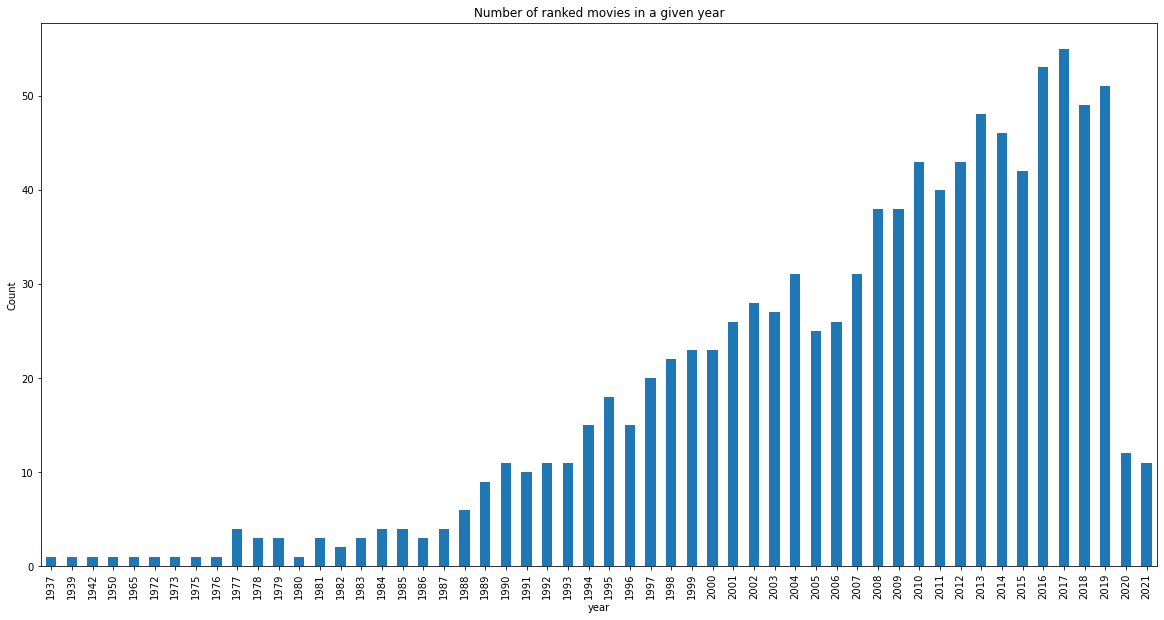

In [46]:
year_group.count().plot(kind = 'bar', figsize = (20,10), title = 'Number of ranked movies in a given year', ylabel = 'Count')

<AxesSubplot:title={'center':'Number of ranked movies considering inflation in a given year'}, xlabel='year', ylabel='Count'>

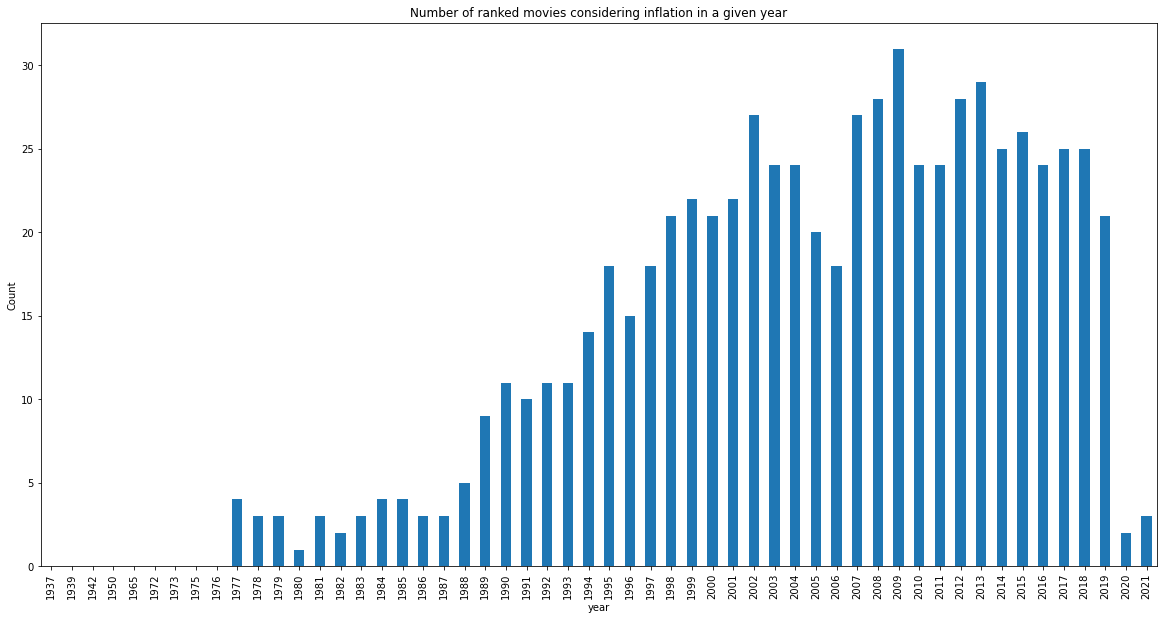

In [47]:
infl_year_group.count().plot(kind = 'bar', figsize = (20,10), title = 'Number of ranked movies considering inflation in a given year', ylabel = 'Count')

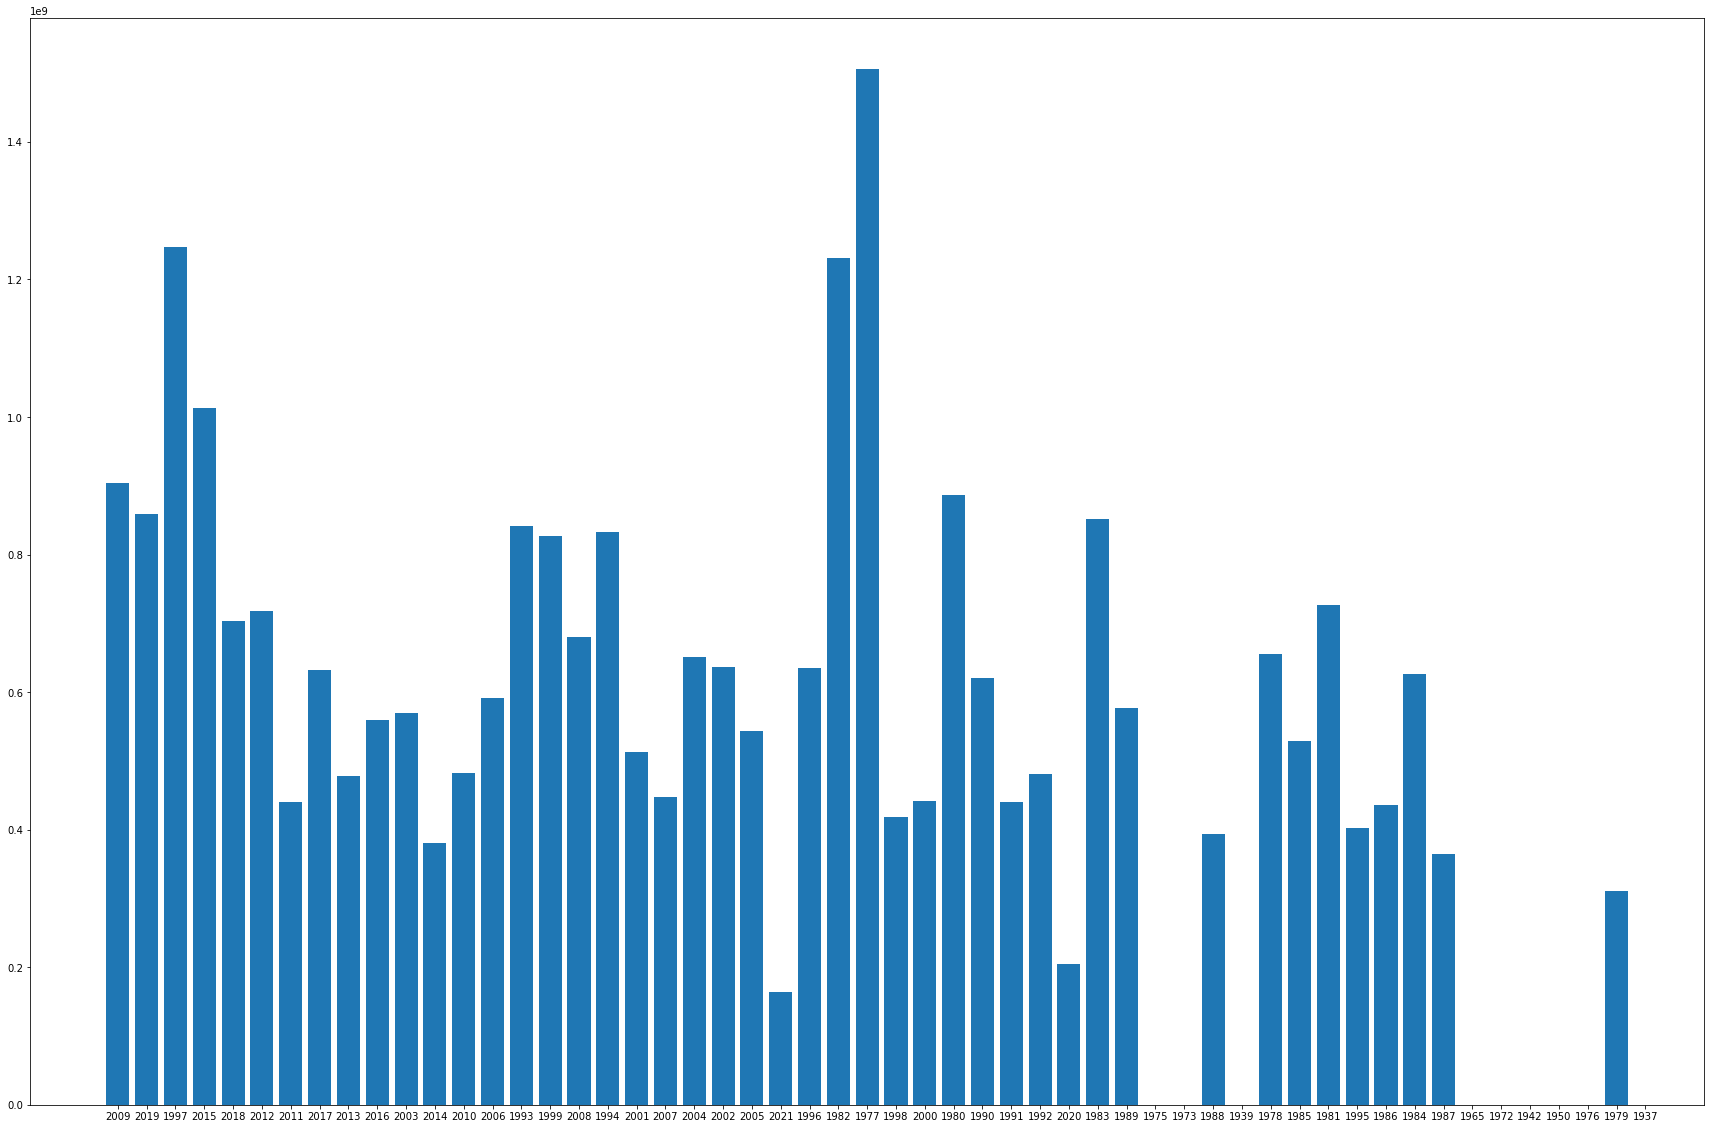

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(30,20))
fig = plt.bar(final_df.year, final_df.Infl_Gross_Box_Office)
#fig2 = plt.scatter(df2.Year,df.no_sign_dom/10000000)
#fig3 = plt.scatter(df2.Year,df2.no_sign_intl/10000000)


In [77]:
final_df.wwbox_office = final_df.wwbox_office.replace('[\$,]', '', regex=True).astype(float)

In [127]:
final_df.infl_gross_box_office = final_df.infl_gross_box_office.replace('[\$,]', '', regex=True).astype(float)
#final_df.dombox_office = final_df.dombox_office.replace('[\$,]', '', regex=True).astype(float)
#final_df.internationalbox_office = final_df.internationalbox_office.replace('[\$,]', '', regex=True).astype(float)

In [128]:
final_df = final_df.replace(r'^\s*$', np.nan, regex=True)


In [129]:
final_df.internationalbox_office = final_df.internationalbox_office.replace('[\$,]', '', regex=True).astype(float)
final_df.dombox_office = final_df.dombox_office.replace('[\$,]', '', regex=True).astype(float)

In [130]:
for value in final_df.internationalbox_office:
    print(value)

2085391916.0
1939427564.0
1548622601.0
1127953592.0
1365725041.0
1017673342.0
1110733362.0
1163874506.0
891742301.0
969551818.0
936311111.0
636434755.0
953199387.0
711453759.0
890614245.0
865695311.0
751066490.0
634223615.0
1010939031.0
806400000.0
823585370.0
743834172.0
808696893.0
740580981.0
702897549.0
771403536.0
742368141.0
806166704.0
858614996.0
634089008.0
639042321.0
557645945.0
737056206.0
653874642.0
642863913.0
522958274.0
691090490.0
804642000.0
643049687.0
767972594.0
552500000.0
691300000.0
538710564.0
711934977.0
664036390.0
465325334.0
564429585.0
607151450.0
647182655.0
557104283.0
651576067.0
701116914.0
659240323.0
589553295.0
686440944.0
648606680.0
555565482.0
494027731.0
628583889.0
576599780.0
558329927.0
675169660.0
601118332.0
575672074.0
690113112.0
516918170.0
545965210.0
718443294.0
679426585.0
614275424.0
542034897.0
479300000.0
440200000.0
498576676.0
640019491.0
535424489.0
468728300.0
841716512.0
434407829.0
832753071.0
537400000.0
418000000.0
4054948

In [100]:
final_df.internationalbox_office.apply(type)

0      <class 'float'>
1      <class 'float'>
2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
            ...       
995    <class 'float'>
996    <class 'float'>
997    <class 'float'>
998    <class 'float'>
999    <class 'float'>
Name: internationalbox_office, Length: 1000, dtype: object

In [101]:
final_df.head()

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,no_sign_ww,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,2845899541,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron]
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),2797800564,[Action],[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]"
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),2207986545,[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron]
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,2064615817,[Adventure],"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams]
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,2044540523,[Action],[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]"


In [102]:
del final_df['no_sign_ww']

In [103]:
final_df.head()

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron]
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),[Action],[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]"
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron]
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,[Adventure],"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams]
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,[Action],[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]"


In [104]:
final_df

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron]
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),[Action],[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]"
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron]
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,[Adventure],"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams]
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,[Action],[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2008,Cloverfield,1.713022e+08,80048433.0,9.125379e+07,/movie/Cloverfield,[Action],[Bad-Robot],NaN,NaN,[],[]
996,997,2002,Mr. Deeds,1.712695e+08,126293452.0,4.497608e+07,/movie/Mr-Deeds,[Comedy],"[Columbia-Pictures, New-Line-Cinema, Happy-Mad...",489,1.991133e+08,[],[]
997,998,2010,The Other Guys,1.709365e+08,119219978.0,5.171649e+07,/movie/Other-Guys-The-(2010),[Comedy],"[Gary-Sanchez-Productions, Mosaic-Media, Sony-...",882,1.384100e+08,"[Will Ferrell, Mark Wahlberg]",[Adam McKay]
998,999,2011,Zookeeper,1.708055e+08,80360866.0,9.044466e+07,/movie/Zookeeper,[Romantic-Comedy],"[Columbia-Pictures, Metro-Goldwyn-Mayer-Pictur...",NaN,NaN,[Kevin James],[Frank Coraci]


### Grab the lead actor and count the number of star leads (max 3)

In [112]:
actor_list = []
actor_list_size = []
for actor in final_df.actors:
    size = 0
    if actor != []:
        actor_list.append(actor[0])
        for member in actor:
            size += 1
        actor_list_size.append(size)
    else:
        actor_list.append('')
        actor_list_size.append(size)

        
len(actor_list)
len(actor_list_size)

1000

In [113]:
final_df['main'] = actor_list
final_df['number_of_stars'] = actor_list_size

In [114]:
final_df.head()

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors,main,number_of_stars
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron],Sam Worthington,2
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),[Action],[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron],Leonardo DiCaprio,2
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,[Adventure],"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams],Adam Driver,3
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,[Action],[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3


### Do the same for directors

In [115]:
director_list = []
director_list_size = []
for director in final_df.directors:
    size = 0
    if director != []:
        director_list.append(director[0])
        for member in director:
            size += 1
        director_list_size.append(size)
    else:
        director_list.append('')
        director_list_size.append(size)

        
print(len(director_list))
print(len(director_list_size))

1000
1000


In [116]:
final_df['director_main'] = director_list
final_df['number_of_directors'] = director_list_size
final_df.head()

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors,main,number_of_stars,director_main,number_of_directors
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,[Action],"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron],Sam Worthington,2,James Cameron,1
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),[Action],[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),[Drama],"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron],Leonardo DiCaprio,2,James Cameron,1
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,[Adventure],"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams],Adam Driver,3,J.J. Abrams,1
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,[Action],[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2


### Replace genre with only top genre to remove list

In [118]:
genre_list = []
for genre in final_df.genre:
    if genre != []:
        genre_list.append(genre[0])
    else:
        genre_list.append('')
len(genre_list)

1000

In [119]:
final_df.genre = genre_list
final_df.head()

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors,main,number_of_stars,director_main,number_of_directors
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,Action,"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron],Sam Worthington,2,James Cameron,1
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),Action,[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),Drama,"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron],Leonardo DiCaprio,2,James Cameron,1
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,Adventure,"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams],Adam Driver,3,J.J. Abrams,1
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,Action,[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2


### Capture top Prod Company and Number of Prod Companies

In [121]:
prod_list = []
prod_list_size = []
for prod in final_df.production_companies:
    size = 0
    if prod != []:
        prod_list.append(prod[0])
        for member in prod:
            size += 1
        prod_list_size.append(size)
    else:
        prod_list.append('')
        prod_list_size.append(size)

        
print(len(prod_list))
print(len(prod_list_size))
print(prod_list)

1000
1000
['Dune-Entertainment', 'Marvel-Studios', '20th-Century-Fox', 'Lucasfilm', 'Marvel-Studios', 'Universal-Pictures', 'Walt-Disney-Pictures', 'Original-Film', 'Marvel-Studios', 'Walt-Disney-Animation-Studios', 'Marvel-Studios', 'Marvel-Studios', 'Warner-Bros', 'Lucasfilm', 'Universal-Pictures', 'Walt-Disney-Animation-Studios', 'Walt-Disney-Pictures', 'Pixar', 'Universal-Pictures', 'Marvel-Studios', 'Universal-Pictures', 'Marvel-Studios', 'Warner-Bros', 'Columbia-Pictures', 'Marvel-Studios', 'Paramount-Pictures', 'Wingnut-Films', 'Eon-Productions', 'di-Bonaventura-Pictures', 'Warner-Bros', 'Pixar', 'Lucasfilm', 'Village-Roadshow-Productions', 'Walt-Disney-Pictures', 'Walt-Disney-Pictures', 'Lucasfilm', 'Walt-Disney-Pictures', 'Walt-Disney-Pictures', 'Universal-Pictures', 'Universal-Pictures', 'Lucasfilm', 'Walt-Disney-Pictures', 'Pixar', 'New-Line-Cinema', 'Walt-Disney-Pictures', 'Legendary-Pictures', 'Walt-Disney-Pictures', 'Universal-Pictures', 'Heyday-Films', 'Columbia-Pictures

In [122]:
final_df['production_companies_main'] = prod_list
final_df['number_of_production_companies'] = prod_list_size
final_df.head()

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors,main,number_of_stars,director_main,number_of_directors,production_companies_main,number_of_production_companies
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,Action,"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron],Sam Worthington,2,James Cameron,1,Dune-Entertainment,3
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),Action,[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),Drama,"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron],Leonardo DiCaprio,2,James Cameron,1,20th-Century-Fox,3
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,Adventure,"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams],Adam Driver,3,J.J. Abrams,1,Lucasfilm,2
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,Action,[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1


In [123]:
final_df.to_csv(r'~/Berkeley_MIDS/data_set.csv', index=True)


In [133]:
final_df.head()

,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors,main,number_of_stars,director_main,number_of_directors,production_companies_main,number_of_production_companies
0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,Action,"[Dune-Entertainment, 20th-Century-Fox, Ingenio...",5,9.041786e+08,"[Sam Worthington, Zoe Saldana]",[James Cameron],Sam Worthington,2,James Cameron,1,Dune-Entertainment,3
1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),Action,[Marvel-Studios],7,8.583730e+08,"[Robert Downey, Jr., Chris Evans, Mark Ruffalo]","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1
2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),Drama,"[20th-Century-Fox, Paramount-Pictures, Lightst...",2,1.247411e+09,"[Leonardo DiCaprio, Kate Winslet]",[James Cameron],Leonardo DiCaprio,2,James Cameron,1,20th-Century-Fox,3
3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,Adventure,"[Lucasfilm, Bad-Robot]",4,1.012399e+09,"[Adam Driver, Daisy Ridley, John Boyega]",[J.J. Abrams],Adam Driver,3,J.J. Abrams,1,Lucasfilm,2
4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,Action,[Marvel-Studios],18,6.825411e+08,"[Robert Downey, Jr., Chris Hemsworth, Mark Ruf...","[Joe Russo, Anthony Russo]","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1
